pip install sktime

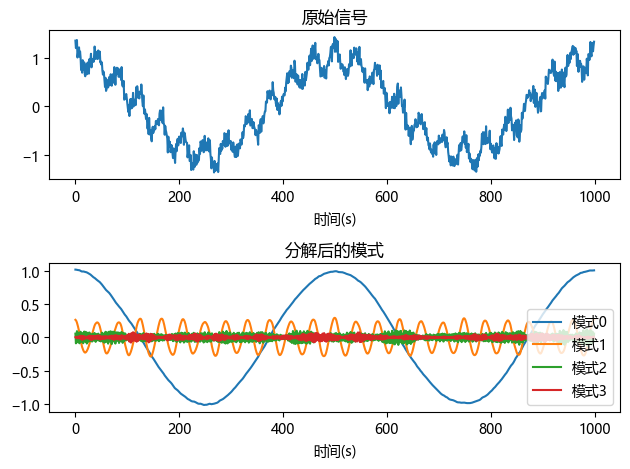

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sktime.libs.vmdpy import VMD

# 时间轴从0到T
T = 1000
fs = 1 / T
t = np.arange(1, T + 1) / T
freqs = 2 * np.pi * (t - 0.5 - fs) / fs

# 各信号成分中心频率
f_1 = 2
f_2 = 24
f_3 = 288

# 构建各模式信号
v_1 = np.cos(2 * np.pi * f_1 * t)
v_2 = 1 / 4 * np.cos(2 * np.pi * f_2 * t)
v_3 = 1 / 16 * np.cos(2 * np.pi * f_3 * t)

# 原始信号，包含三个成分加上随机噪声
f = v_1 + v_2 + v_3 + 0.1 * np.random.randn(v_1.size)

# VMD算法的示例参数设置
alpha = 2000  # 中等带宽约束
tau = 0.0  # 容忍噪声（不强制保真度）
K = 4  # 预期3个模式
DC = 0  # 不施加直流部分的约束
init = 1  # 统一初始化频域系数
tol = 1e-7

# 运行VMD算法
u, u_hat, omega = VMD(f, alpha, tau, K, DC, init, tol)

# 可视化分解后的模式
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f)
plt.title("原始信号")
plt.xlabel("时间(s)")
plt.subplot(2, 1, 2)
plt.plot(u.T)
plt.title("分解后的模式")
plt.xlabel("时间(s)")
plt.legend([f"模式{m_i}" for m_i in range(u.shape[0])])
plt.tight_layout()